<a href="https://colab.research.google.com/github/MrTwinCharge/mnistRecog/blob/main/mnistRecog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#necessary imports
import torch
import torchvision
from torchvision import transforms,datasets
import torch.nn as nn
import torch.nn.functional as F

#establish train and test datasets

train = datasets.MNIST("", train = True, download = True, transform = transforms.Compose([transforms.ToTensor()]))
test = datasets.MNIST("", train = False, download = True, transform = transforms.Compose([transforms.ToTensor()]))

#utilize dataloader, batch_Size refers to how many at a time to pass to model

trainSet = torch.utils.data.DataLoader(train, batch_size = 10, shuffle=True)
testSet = torch.utils.data.DataLoader(test, batch_size = 10, shuffle = True)

#definition of network
class Net(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(784, 64)
    self.fc2 = nn.Linear(64, 64)
    self.fc3 = nn.Linear(64, 64)
    self.fc4 = nn.Linear(64, 10)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = self.fc4(x)
    return F.log_softmax(x, dim = 1)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [30]:
#optimizer + loss calculation

#necessary import
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr = 0.001) #lr refers to learning rate

EPOCHS = 3 # number of passes through dataset

#loop through dataset + pass into network
for epoch in range (EPOCHS):
  for data in trainSet: #where data is a batch of featuresets
    X,y = data
    net.zero_grad()
    output = net(X.view(-1, 28*28))

    #loss calculation
    loss = F.nll_loss(output, y)
    loss.backward()
    optimizer.step()
  print(loss)

tensor(0.0385, grad_fn=<NllLossBackward0>)
tensor(0.2612, grad_fn=<NllLossBackward0>)
tensor(0.0111, grad_fn=<NllLossBackward0>)


In [38]:
#measurement of accuracy

correct = 0
total = 0

with torch.no_grad():
  for data in testSet:
    X,y = data
    output = net(X.view(-1, 784))
    for idx, i in enumerate(output):
      if torch.argmax(i) == y[idx]:
        correct += 1
      total += 1
print("Accuracy: ", round(correct/total, 3))

Accuracy:  0.972


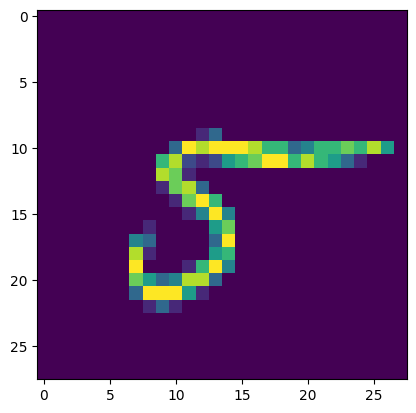

In [36]:
#visualization

import matplotlib.pyplot as plt
plt.imshow(X[1].view(28,28))
plt.show()

In [37]:
print(torch.argmax(net(X[1].view(-1, 784))[0]))

tensor(5)
